In [1]:
%load_ext autoreload
%autoreload 2
from nlp.src.Utils.RessourceLoader import set_data_path
set_data_path("/home/emanuel/Coding/NLP/backend-nlp/data")
from nlp.src.Components.Oie.HyperKnowledgeGraph.KnowledgeHyperGraph import KnowledgeHyperGraph
from nlp.src.Components.Oie.HyperKnowledgeGraph.Transformers.PatternAggregator.PatternAggregator import PatternAggregator
from nlp.src.Components.Oie.HyperKnowledgeGraph.Queries.QuerySet import Q

In [2]:
graph=KnowledgeHyperGraph.load(f'wiki_top{500}',compressed=True)

In [3]:

pattern_config={
    'node_property': 'aux_text',
    'max_depth': 2,
    'ignore_types':'*',
    'by_type': {
        'np':{
            'max_depth':0,
            'node_property':'type'
        },
        'adjp':{
            'node_property':'lemma',
            'max_depth':0
        },
        'pp':{
            'max_depth':1,
            'by_type':{
                'np':{
                    'node_property':'ner',
                    'max_depth':0
                }
            },
            'ignore_types':'*',
            'node_property':'text',
        },
        '*':{
            'node_property':'type',
            'max_depth':0
        }
    },
}

pattern_aggregator=PatternAggregator(config=pattern_config,pattern=Q(type="vp"))
stats=pattern_aggregator(graph)
print(stats.preview(1000))

[0] <HierarchicalPattern :was>: 8979
[1] <HierarchicalPattern :is>: 2867
[2] <HierarchicalPattern :were>: 2349
[3] <HierarchicalPattern :would>: 2231
[4] <HierarchicalPattern :be>: 1956
[5] <HierarchicalPattern :been>: 1814
[6] <HierarchicalPattern :np is np>: 1482
[7] <HierarchicalPattern :are>: 1257
[8] <HierarchicalPattern :can>: 941
[9] <HierarchicalPattern :will>: 928
[10] <HierarchicalPattern :np was np>: 902
[11] <HierarchicalPattern :could>: 684
[12] <HierarchicalPattern :">: 662
[13] <HierarchicalPattern :being>: 642
[14] <HierarchicalPattern :may>: 459
[15] <HierarchicalPattern :np are np>: 416
[16] <HierarchicalPattern :np said sbar>: 396
[17] <HierarchicalPattern :np has np>: 341
[18] <HierarchicalPattern :should>: 310
[19] <HierarchicalPattern :np include np>: 293
[20] <HierarchicalPattern :to be np>: 264
[21] <HierarchicalPattern :np had np>: 243
[22] <HierarchicalPattern :based on>: 241
[23] <HierarchicalPattern :np is>: 238
[24] <HierarchicalPattern :having>: 213
[25] <

/home/emanuel/anaconda3/envs/nlp/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


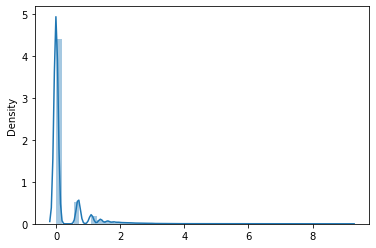

In [5]:
import seaborn as sbn
import numpy as np
counts=np.array([value for key,value in pattern_aggregator.pattern_counter.items()])

sbn.distplot(np.log(counts))

In [6]:
import pandas as pd
df=pd.DataFrame(counts, columns=['counts'])

In [7]:
THRESHOLD=10
total_sum=df.sum()['counts']

df_threshold=df[df['counts']>=THRESHOLD]
threshold_sum=df_threshold.sum()['counts']
print("elements bigger than threshold ",len(df_threshold))
print("threshold sum ",threshold_sum, threshold_sum/total_sum)
print("total elements ",len(df))

elements bigger than threshold  1206
threshold sum  59596 0.40880218408308294
total elements  63454


In [11]:
for vp in stats[stats.nth(912)]:
    print(vp.full_text)

After media reports of these comments circulated , Republicans joined Trump 's aides and legal counsel in distancing themselves from his remarks .
The country joined the World Trade Organization in 2001 , and maintained its high rate of economic growth under Hu Jintao and Wen Jiabao 's leadership in the 2000s .
Yovanovitch joined the U.S. Foreign Service in 1986 .
He joined the British Army in 1895 , and saw action in British India , the Anglo – Sudan War , and the Second Boer War , gaining fame as a war correspondent and writing books about his campaigns .
Having been a member of the Conservatives between 2008 and 2011 , Rachel Johnson joined the Liberal Democrats in 2017 .
To gain further match experience , Messi joined Barcelona C in addition to the Juveniles A , playing his first game for the third team on 29 November .
Elizabeth Lail joined the leading role for the film in March 2019 .
Switzerland joined the Council of Europe in 1963 .
European joined the Union Army in large numbe

In [ ]:
pattern=Q(type="vp", decorated__independent=True)
config={
    'by_type':{
        'np':{
            ''
        }
    }
}